In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
aspirantes_mcd = pd.read_excel('aspirantes-mcd_tidy.xlsx')
aspirantes_mcd

,Sexo,Edad,Nacionalidad,Estado Civil,Experiencia,Licenciatura: Institución,Licenciatura: Programa,Licenciatura: Promedio,Licenciatura: Tipo Titulación,Aceptado
0,MUJER,33,True,CASADO(A),8,UNIVERSIDAD ESTATAL DE SONORA,LIC. EN ADMINISTRACION DE EMPRESAS TURÍSTICAS,97.00,EXAMEN NACIONAL DE CALIDAD (CENEVAL),True
1,MUJER,33,True,CASADO(A),0,UNIVERSIDAD DE SONORA,LIC. EN FÍSICA,93.00,POR PROMEDIO,True
2,HOMBRE,53,True,DIVORCIADO(A),27,INSTITUTO TECNOLÓGICO DE CHIHUAHUA,INGENIERÍA ELECTRÓNICA,91.00,POR PROMEDIO,False
3,HOMBRE,38,True,CASADO(A),0,UNIVERSIDAD DE SONORA,INGENIERÍA INDUSTRIAL Y DE SISTEMAS,80.70,EXAMEN NACIONAL DE CALIDAD (CENEVAL),True
4,HOMBRE,32,True,SOLTERO(A),2,UNIVERSIDAD DEL VALLE DE MÉXICO,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,90.30,EXAMEN NACIONAL DE CALIDAD (CENEVAL),True
...,...,...,...,...,...,...,...,...,...,...
235,HOMBRE,23,True,SOLTERO(A),0,INSTITUTO TECNOLÓGICO DE HERMOSILLO,INGENIERÍA MECATRÓNICA,92.16,TRABAJO PROFESIONAL,False
236,HOMBRE,24,True,SOLTERO(A),0,UNIVERSIDAD DE SONORA,LICENCIATURA EN FÍSICA,90.00,POR PROMEDIO,True
237,HOMBRE,28,True,SOLTERO(A),5,UNISON,LICENCIATURA EN MATEMATICAS,89.70,TESIS PROFESIONAL,False
238,HOMBRE,28,True,SOLTERO(A),0,UNISON,LICENCIATURA EN CIENCIAS DE LA COMPUTACIÓN,87.74,POR PROMEDIO,False


In [46]:
df = aspirantes_mcd[['Nacionalidad', 'Aceptado']]

In [47]:
num_mexicanos = df[df['Nacionalidad'] == True].value_counts()
num_extranjeros = df[df['Nacionalidad'] == False].value_counts()

num_mexicanos

Nacionalidad  Aceptado
True          False       164
              True         52
Name: count, dtype: int64

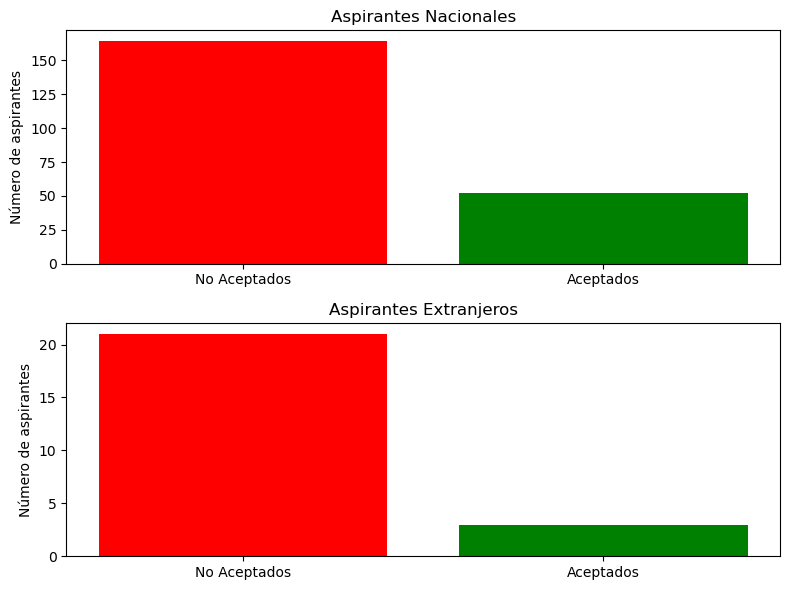

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Gráfica para nacionales
axes[0].bar(['No Aceptados', 'Aceptados'], num_mexicanos.values, color=['red', 'green'])
axes[0].set_title('Aspirantes Nacionales')
axes[0].set_ylabel('Número de aspirantes')

# Gráfica para extranjeros
axes[1].bar(['No Aceptados', 'Aceptados'], num_extranjeros.values, color=['red', 'green'])
axes[1].set_title('Aspirantes Extranjeros')
axes[1].set_ylabel('Número de aspirantes')

plt.tight_layout()
plt.savefig('..\\graficas\\aspirantes-nacionales-extranjeros')
plt.show()

In [49]:
# Gráfico de Cajas y Bigotes con: Edad de aspirantes y aceptados.
# Gráfico de Cajas y Bigotes con: Promedio de licenciatura de aspirantes y aceptados.
# Gráfico de Cajas y Bigotes con: Experiencia de aspirantes y aceptados.

In [114]:
df_boxplot = aspirantes_mcd[["Edad", "Experiencia", "Licenciatura: Promedio", "Aceptado"]].reset_index(drop = True)
print(df_boxplot.shape)
df_boxplot.head()


(240, 4)


,Edad,Experiencia,Licenciatura: Promedio,Aceptado
0,33,8,97.0,True
1,33,0,93.0,True
2,53,27,91.0,False
3,38,0,80.7,True
4,32,2,90.3,True


In [115]:
df_boxplot_aceptados = df_boxplot.loc[df_boxplot["Aceptado"] == True]
print(df_boxplot_aceptados.shape)
df_boxplot_aceptados.head()

(55, 4)


,Edad,Experiencia,Licenciatura: Promedio,Aceptado
0,33,8,97.0,True
1,33,0,93.0,True
3,38,0,80.7,True
4,32,2,90.3,True
5,26,0,97.8,True


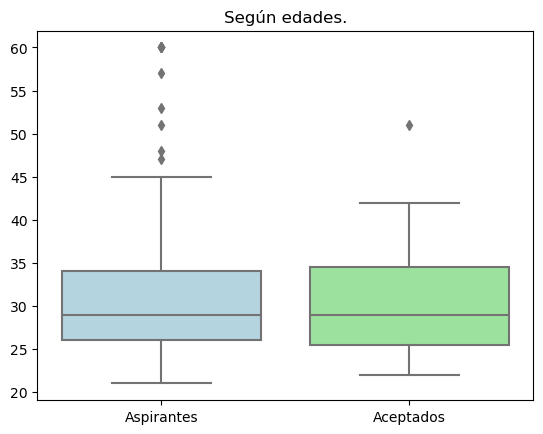

In [123]:
# Boxplot según edades...
sns.boxplot(data = [df_boxplot["Edad"], df_boxplot_aceptados["Edad"]], palette=['lightblue', 'lightgreen'])
plt.title("Según edades.")
plt.xticks([0, 1], ["Aspirantes", "Aceptados"])
plt.show()

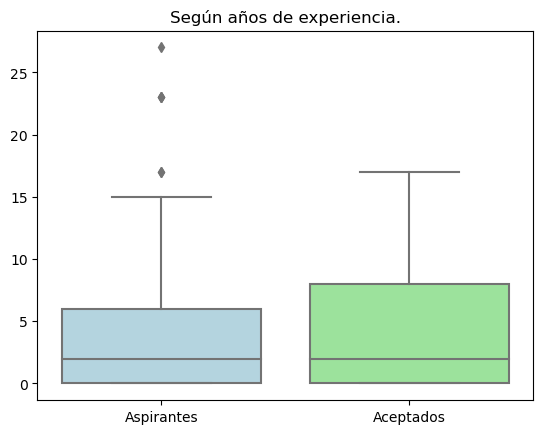

In [122]:
# Boxplot según años de experiencia...
sns.boxplot(data = [df_boxplot["Experiencia"], df_boxplot_aceptados["Experiencia"]], palette=['lightblue', 'lightgreen'])
plt.title('Según años de experiencia.')
plt.xticks([0, 1], ["Aspirantes", "Aceptados"])
plt.show()

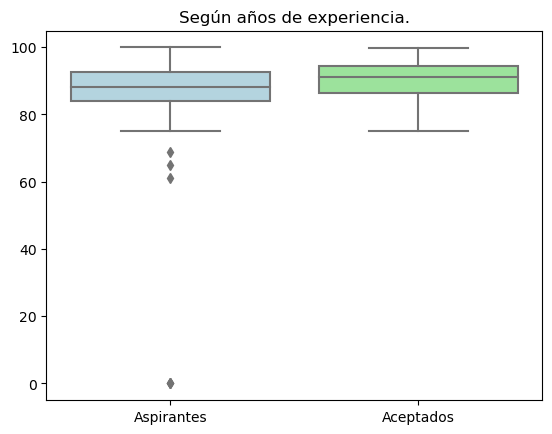

In [124]:
# Boxplot según Promedios...
sns.boxplot(data = [df_boxplot["Licenciatura: Promedio"], df_boxplot_aceptados["Licenciatura: Promedio"]], palette=['lightblue', 'lightgreen'])
plt.title('Según años de experiencia.')
plt.xticks([0, 1], ["Aspirantes", "Aceptados"])
plt.show()